# Part one import libraries and read data

In [159]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### read data

In [160]:
df=pd.read_csv("Weather Data.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### describe data

In [161]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [163]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [164]:
df.shape

(8784, 8)

# Part two data preprocessing

In [165]:
df.drop(columns=['Weather','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa'],inplace=True)

In [166]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])
df

,Date/Time,Temp_C
0,2012-01-01 00:00:00,-1.8
1,2012-01-01 01:00:00,-1.8
2,2012-01-01 02:00:00,-1.8
3,2012-01-01 03:00:00,-1.5
4,2012-01-01 04:00:00,-1.5
...,...,...
8779,2012-12-31 19:00:00,0.1
8780,2012-12-31 20:00:00,0.2
8781,2012-12-31 21:00:00,-0.5
8782,2012-12-31 22:00:00,-0.2


In [167]:
print (f"The maximum datetime: {df['Date/Time'].max()}")
print (f"The minmum datetime: {df['Date/Time'].min()}")

The maximum datetime: 2012-12-31 23:00:00
The minmum datetime: 2012-01-01 00:00:00


In [168]:
df.rename({'Date/Time':'Date'},axis=1,inplace=True)
df.index=df['Date']
df.drop('Date',axis=1,inplace=True)

df

,Temp_C
Date,
2012-01-01 00:00:00,-1.8
2012-01-01 01:00:00,-1.8
2012-01-01 02:00:00,-1.8
2012-01-01 03:00:00,-1.5
2012-01-01 04:00:00,-1.5
...,...
2012-12-31 19:00:00,0.1
2012-12-31 20:00:00,0.2
2012-12-31 21:00:00,-0.5


# Part three EDA 

Text(0.5, 1.0, 'Temp')

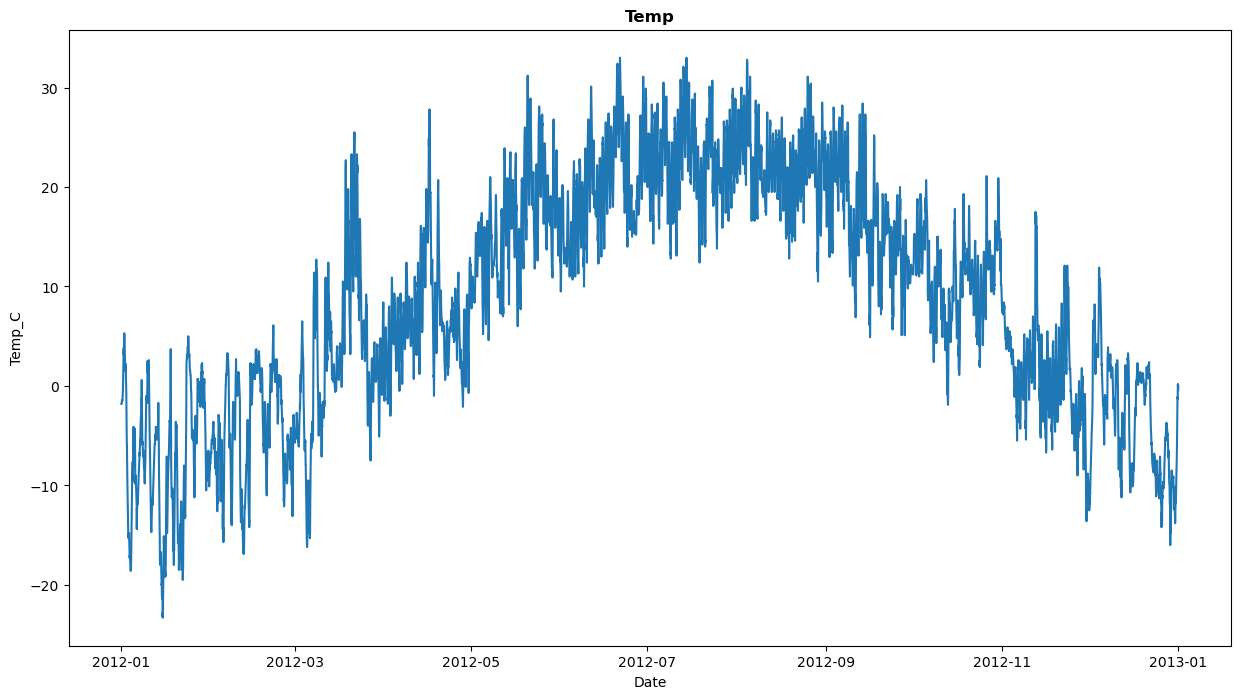

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates
import seaborn as sns
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df,x='Date',y='Temp_C')
plt.title('Temp',weight='bold')

# Part Four Train Test split

In [170]:
# [[[1],[2],[3],[4],[5]]],[6]
# [[[2],[3],[4],[5],[6]]],[7]
# [[[[3],[4],[5],[6],[7],[8]


def df_to_x_y(df,window_size=5):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row=[ [a] for a in df_as_np[i:i+5] ]
        x.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(x) , np.array(y)

In [171]:
Window_Size=5
x,y=df_to_x_y(df,Window_Size)

print (x.shape,y.shape)

(8779, 5, 1, 1) (8779, 1)


In [172]:
x_train=x[:6500]
y_train=y[:6500]
x_val=x[6500:7500]
y_val=y[6500:7500]
x_test=x[7500:]
y_test=y[7500:]


print (f'x_train.shape:{x_train.shape} , y_train.shape: {y_train.shape}')
print (f'x_val.shape:{x_val.shape} , y_val.shape: {y_val.shape}')
print (f'x_test.shape:{x_test.shape} , y_test.shape: {y_test.shape}')

x_train.shape:(6500, 5, 1, 1) , y_train.shape: (6500, 1)
x_val.shape:(1000, 5, 1, 1) , y_val.shape: (1000, 1)
x_test.shape:(1279, 5, 1, 1) , y_test.shape: (1279, 1)


# Part five build model

### Using LSTM

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



model1=Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(units=128,return_sequences=True))
model1.add(LSTM(units=128,return_sequences=False))

model1.add(Dense(16,'relu'))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                       │ (None, 5, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,225 (782.13 KB)

 Trainable params: 200,225 (782.13 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
model1.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [221]:
history1 = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, callbacks=[early_stopping])

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 179.7845 - root_mean_squared_error: 13.2708 - val_loss: 14.1659 - val_root_mean_squared_error: 3.7914
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 20.1388 - root_mean_squared_error: 4.4706 - val_loss: 3.9749 - val_root_mean_squared_error: 1.9693
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.5884 - root_mean_squared_error: 2.7499 - val_loss: 2.6251 - val_root_mean_squared_error: 1.5992
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.5210 - root_mean_squared_error: 2.1245 - val_loss: 1.7728 - val_root_mean_squared_error: 1.3083
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.9713 - root_mean_squared_error: 1.7227 - val_loss: 1.4505 - val_root_mean_squared_error: 1.1803
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2.4693 - root_mean_squared_error: 1.5708 - val_loss: 1.3045 - val_root_mean_squared_error: 1.1203
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms

In [222]:
from sklearn.metrics import r2_score
train_pred=model1.predict(x_train).flatten()
train_result=pd.DataFrame(data={"actual":y_train.reshape(-1),"pred":train_pred})
r2=r2_score(y_train,train_pred)
print (f'r2: {r2}')
train_result

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
r2: 0.9939110936272475


,actual,pred
0,-1.4,-1.377536
1,-1.5,-1.295065
2,-1.4,-1.397869
3,-1.4,-1.393714
4,-1.3,-1.368236
...,...,...
6495,11.5,9.948304
6496,9.4,11.287306
6497,9.3,9.018882
6498,9.2,8.844653


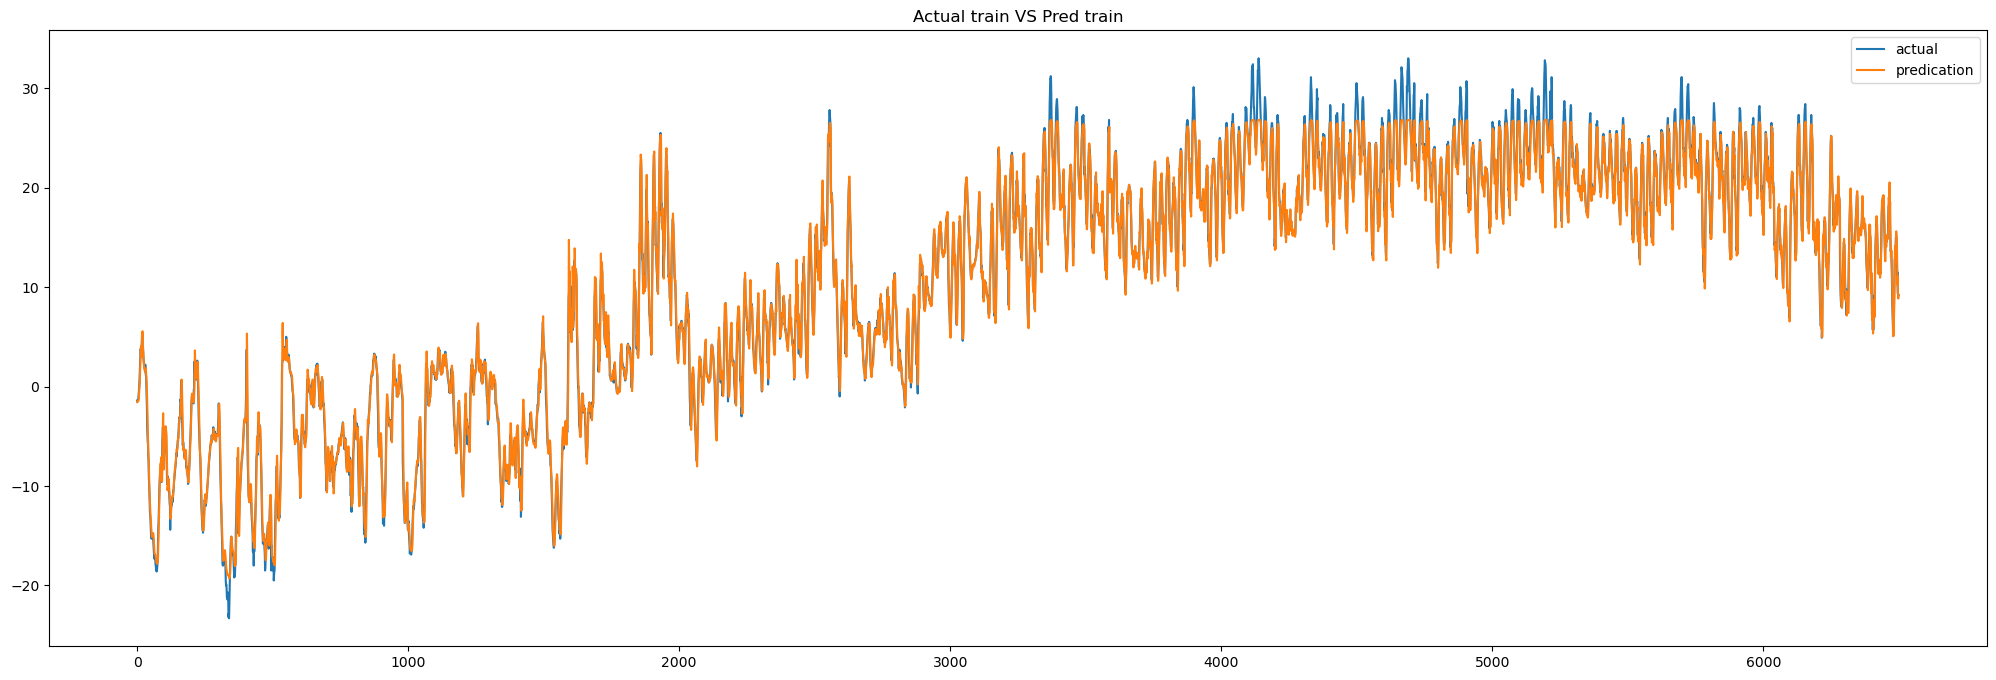

In [179]:
fig=plt.figure(figsize=(25,8))
plt.plot(y_train)
plt.plot(train_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

In [223]:
val_pred=model1.predict(x_val).flatten()
val_result=pd.DataFrame(data={"actual":y_val.reshape(-1),"pred":val_pred})
r2=r2_score(y_val,val_pred)
print (f'r2: {r2}')
val_result

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
r2: 0.9755492906774457


,actual,pred
0,8.0,9.027524
1,8.9,7.524163
2,7.2,8.783729
3,6.0,6.797593
4,5.1,5.478653
...,...,...
995,3.9,3.537401
996,4.7,4.391289
997,5.1,5.236211
998,5.2,5.549814


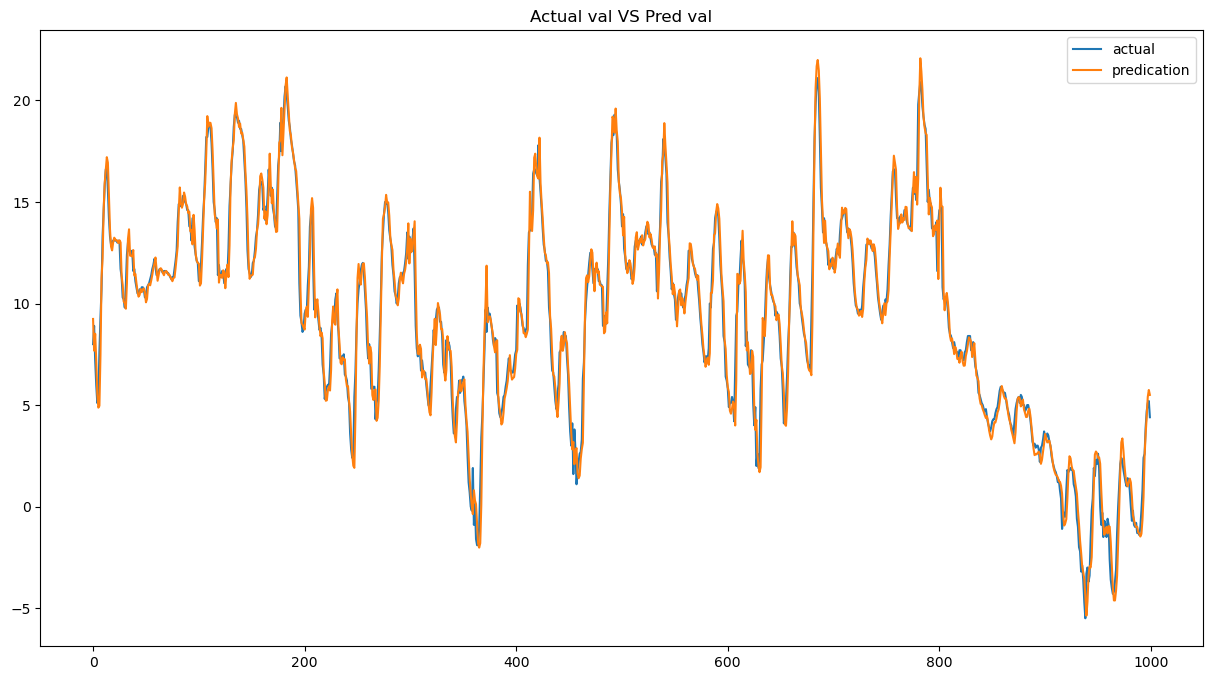

In [181]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_val)
plt.plot(val_pred)
plt.legend(['actual','predication'])
plt.title("Actual val VS Pred val")
plt.show()

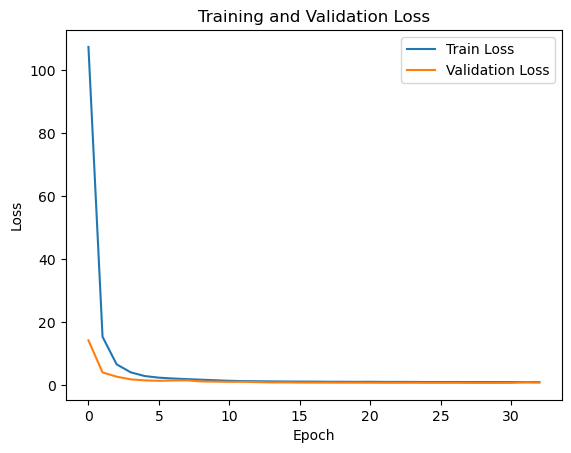

In [224]:
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [225]:
test_pred=model.predict(x_test).flatten()
test_result=pd.DataFrame(data={"actual":y_test.reshape(-1),"pred":test_pred})
r2=np.round(r2_score(y_test,test_pred),2)
print (r2)
print ("-------------------------------------")
test_result

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.9
-------------------------------------


,actual,pred
0,3.2,4.750872
1,2.4,4.246524
2,1.8,3.527583
3,1.7,2.818484
4,0.5,2.282180
...,...,...
1274,0.1,-1.631227
1275,0.2,-1.012686
1276,-0.5,-0.444331
1277,-0.2,-0.164406


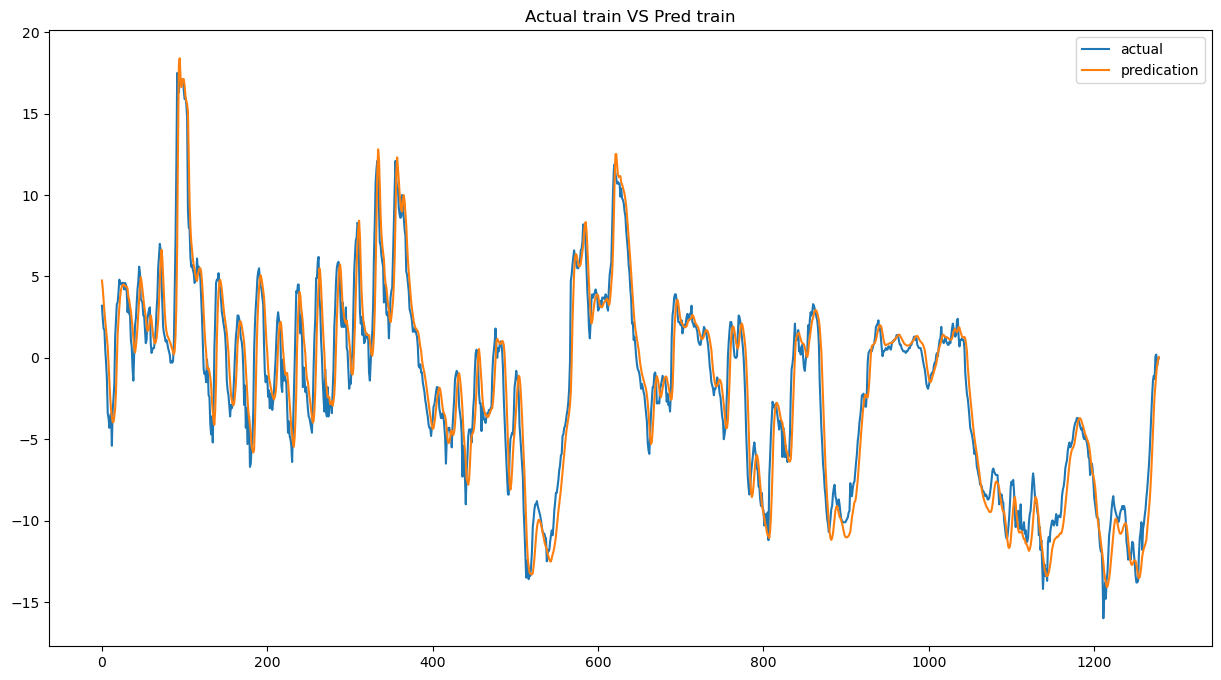

In [184]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(test_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

### Using Conv1D

In [185]:
from tensorflow.keras.layers import Conv1D

model2=Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(32,kernel_size=2))
model2.add(Flatten())
model2.add(Dense(4),'relu')
model2.add(Dense(1),'linear')
model2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 4, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 4)                   │             516 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 617 (2.41 KB)

 Trainable params: 617 (2.41 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
model2.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.00001),metrics=[RootMeanSquaredError()])
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [187]:
history2=model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,callbacks=[early_stopping])

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 461.6989 - root_mean_squared_error: 21.4860 - val_loss: 178.2547 - val_root_mean_squared_error: 13.4914
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 410.0977 - root_mean_squared_error: 20.2477 - val_loss: 158.4584 - val_root_mean_squared_error: 12.7193
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 357.0523 - root_mean_squared_error: 18.8950 - val_loss: 140.3702 - val_root_mean_squared_error: 11.9704
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 313.2834 - root_mean_squared_error: 17.6992 - val_loss: 123.8026 - val_root_mean_squared_error: 11.2408
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 282.8799 - root_mean_squared_error: 16.8171 - val_loss: 108.5162 - val_root_mean_squared_error: 10.5229
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243.7924 - root_mean_squared_error: 15.6132 - val_loss: 94.3696 - val_root_mean_squared_error: 9.8118
Epoch 7/50
204/204

In [188]:
from sklearn.metrics import r2_score
train_pred=model2.predict(x_train).flatten()
train_result=pd.DataFrame(data={"actual":y_train.reshape(-1),"pred":train_pred})
r2=r2_score(y_train,train_pred)
print (f'r2: {r2}')
train_result

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
r2: 0.969370184416808


,actual,pred
0,-1.4,-1.416575
1,-1.5,-1.344727
2,-1.4,-1.299318
3,-1.4,-1.217464
4,-1.3,-1.194840
...,...,...
6495,11.5,13.336433
6496,9.4,12.902171
6497,9.3,11.669724
6498,9.2,10.651764


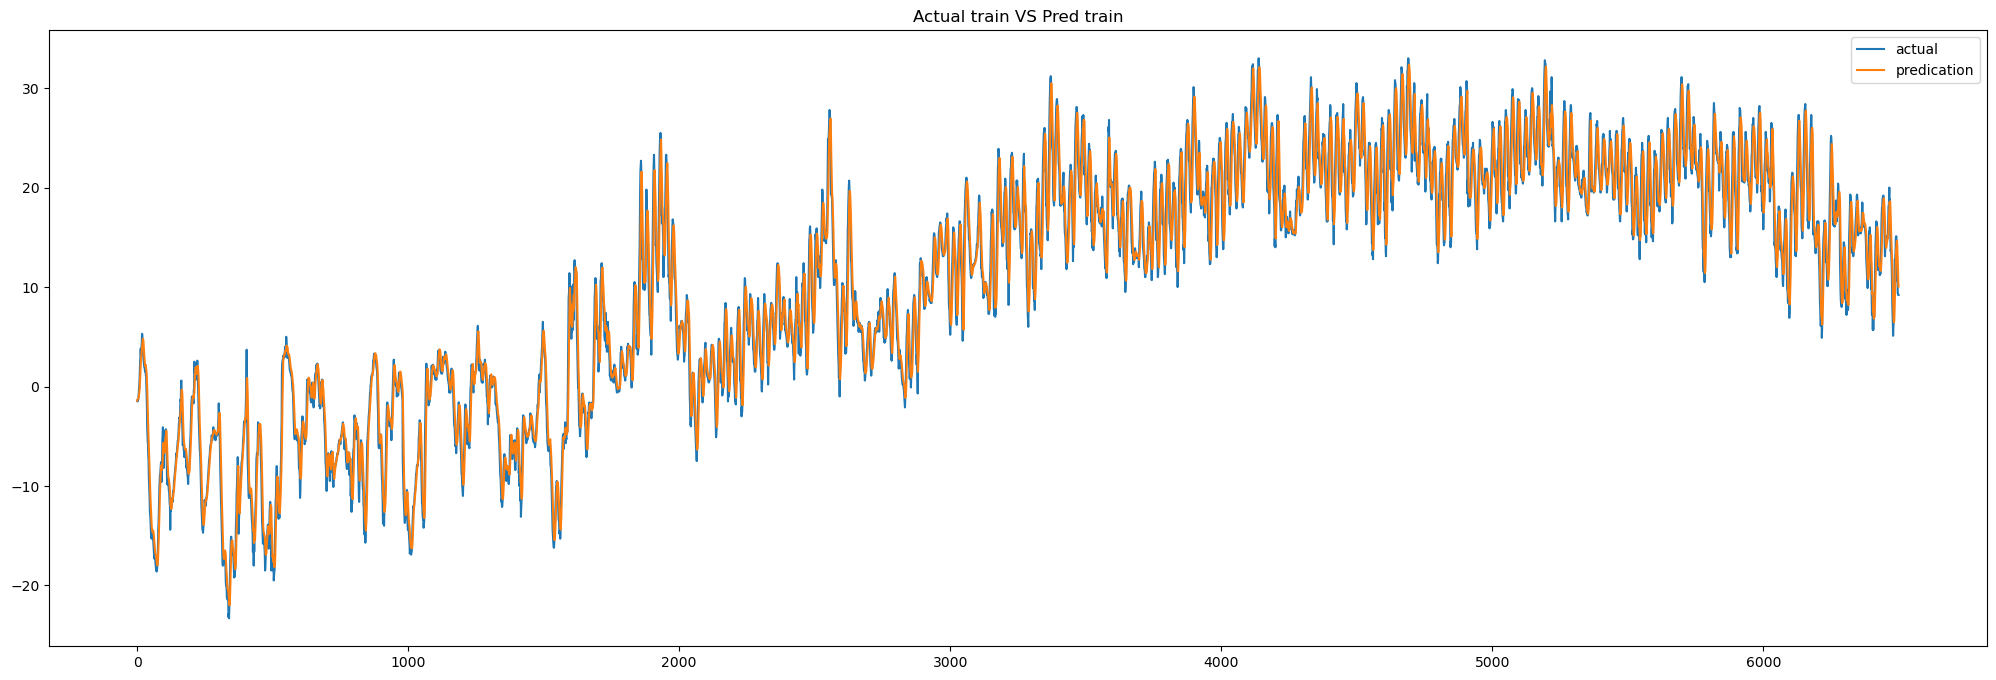

In [189]:
fig=plt.figure(figsize=(25,8))
plt.plot(y_train)
plt.plot(train_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

In [191]:
val_pred=model2.predict(x_val).flatten()
val_result=pd.DataFrame(data={"actual":y_val.reshape(-1),"pred":val_pred})
r2=r2_score(y_val,val_pred)
print (f'r2: {r2}')
val_result

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
r2: 0.8882441690242285


,actual,pred
0,8.0,9.761904
1,8.9,8.982532
2,7.2,9.027026
3,6.0,8.467062
4,5.1,7.702721
...,...,...
995,3.9,1.302344
996,4.7,2.297705
997,5.1,3.282374
998,5.2,4.039662


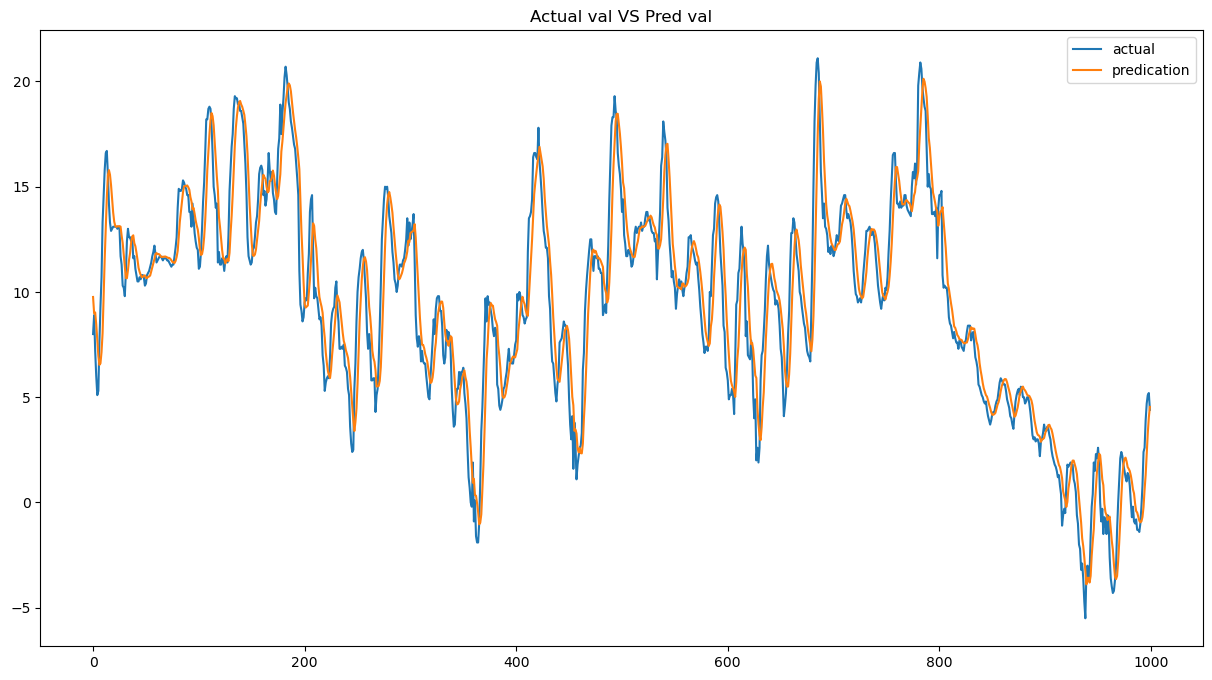

In [192]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_val)
plt.plot(val_pred)
plt.legend(['actual','predication'])
plt.title("Actual val VS Pred val")
plt.show()

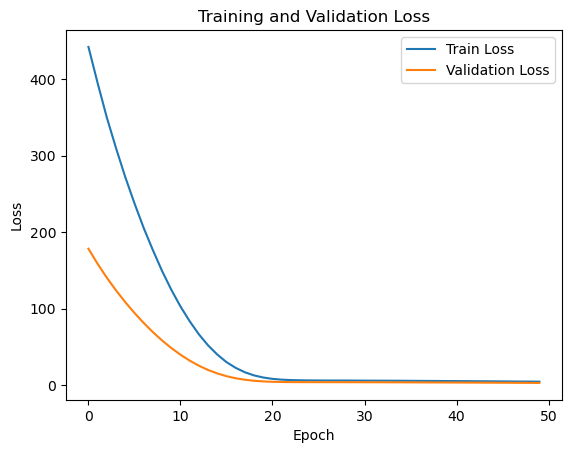

In [193]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [194]:
test_pred=model2.predict(x_test).flatten()
test_result=pd.DataFrame(data={"actual":y_test.reshape(-1),"pred":test_pred})
r2=np.round(r2_score(y_test,test_pred),2)
print (r2)
print ("-------------------------------------")
test_result

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.91
-------------------------------------


,actual,pred
0,3.2,4.756934
1,2.4,4.492819
2,1.8,4.032615
3,1.7,3.411080
4,0.5,2.790277
...,...,...
1274,0.1,-1.620967
1275,0.2,-0.803851
1276,-0.5,-0.351439
1277,-0.2,-0.346374


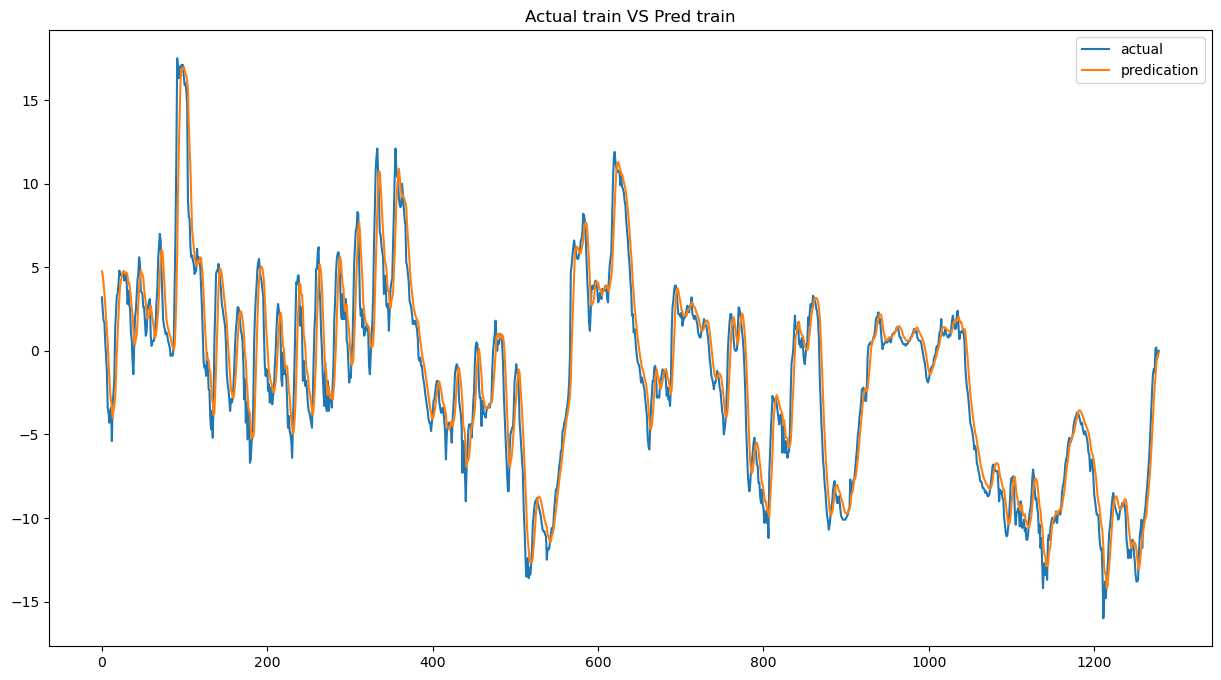

In [195]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(test_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

### Using GRU

In [196]:
from tensorflow.keras.layers import GRU

model3=Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))
model3.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                          │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
model3.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError])
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [201]:
history3=model3.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,callbacks=[early_stopping])

Epoch 1/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 79.7506 - root_mean_squared_error: 8.9234 - val_loss: 7.6773 - val_root_mean_squared_error: 2.7829
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51.6133 - root_mean_squared_error: 7.1733 - val_loss: 2.9227 - val_root_mean_squared_error: 1.7051
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30.0341 - root_mean_squared_error: 5.4754 - val_loss: 1.6968 - val_root_mean_squared_error: 1.2902
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.8924 - root_mean_squared_error: 4.2274 - val_loss: 1.2410 - val_root_mean_squared_error: 1.0972
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12.4319 - root_mean_squared_error: 3.5236 - val_loss: 1.0216 - val_root_mean_squared_error: 0.9944
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.0608 - root_mean_squared_error: 3.0048 - val_loss: 0.9289 - val_root_mean_squared_error: 0.9447
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [202]:
train_pred=model3.predict(x_train).flatten()
train_result=pd.DataFrame(data={"actual":y_train.reshape(-1),"pred":train_pred})
r2=r2_score(y_train,train_pred)
print (f'r2: {r2}')
train_result

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
r2: 0.9936730813721449


,actual,pred
0,-1.4,-1.428211
1,-1.5,-1.434543
2,-1.4,-1.553881
3,-1.4,-1.468080
4,-1.3,-1.412107
...,...,...
6495,11.5,10.121495
6496,9.4,11.581579
6497,9.3,9.018435
6498,9.2,9.099906


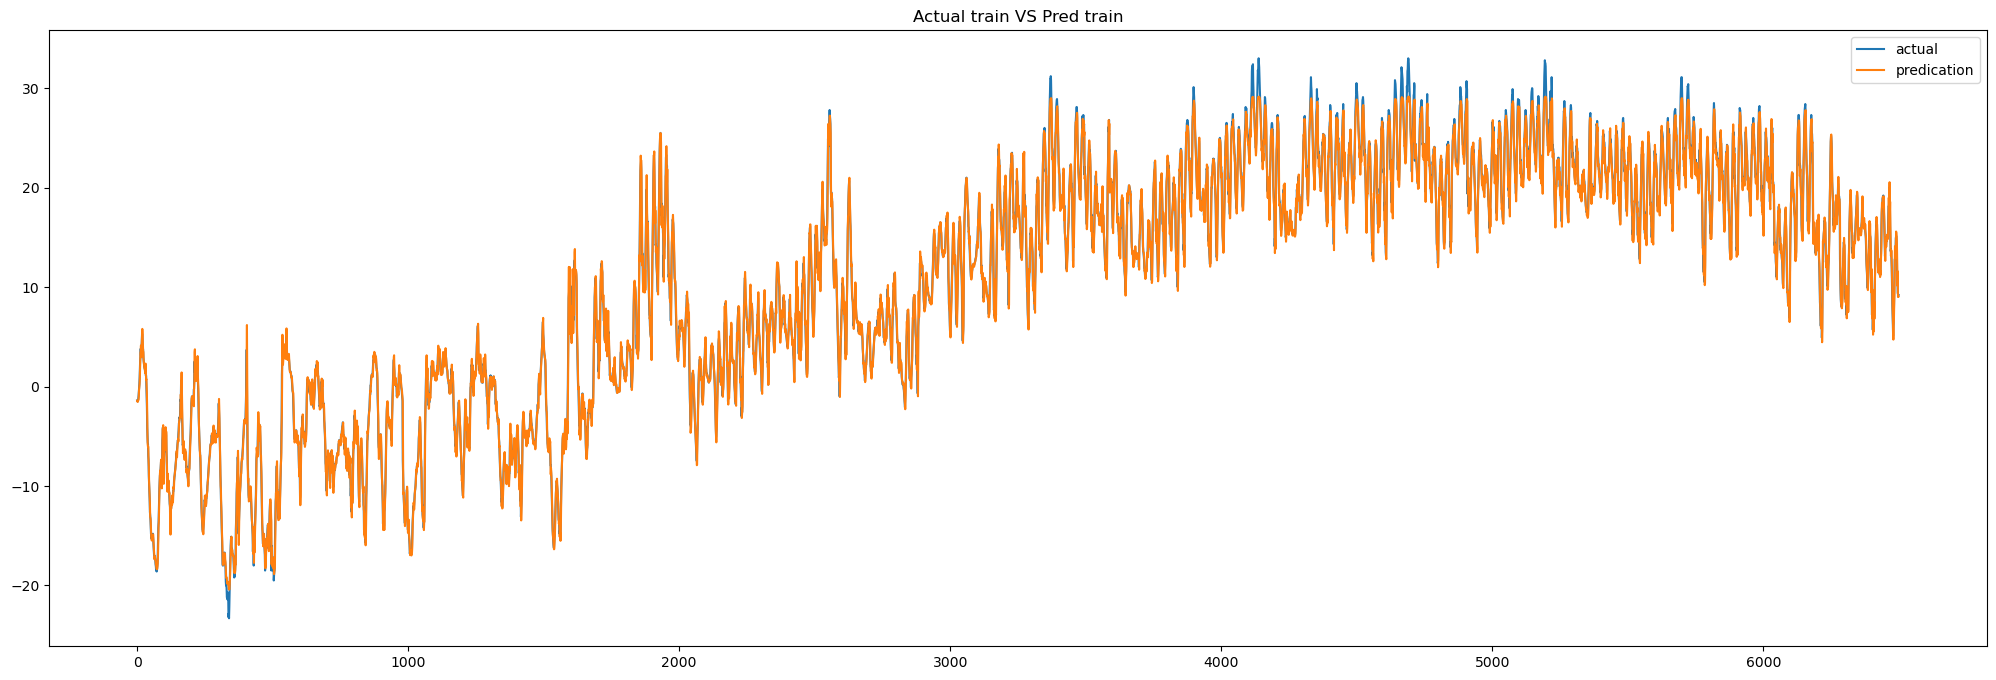

In [203]:
fig=plt.figure(figsize=(25,8))
plt.plot(y_train)
plt.plot(train_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

In [206]:
val_pred=model3.predict(x_val).flatten()
val_result=pd.DataFrame(data={"actual":y_val.reshape(-1),"pred":val_pred})
r2=r2_score(y_val,val_pred)
print (f'r2: {r2}')
val_result

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
r2: 0.9757985807757503


,actual,pred
0,8.0,9.125039
1,8.9,7.665173
2,7.2,9.030093
3,6.0,6.868646
4,5.1,5.605957
...,...,...
995,3.9,3.523755
996,4.7,4.312730
997,5.1,5.379355
998,5.2,5.527310


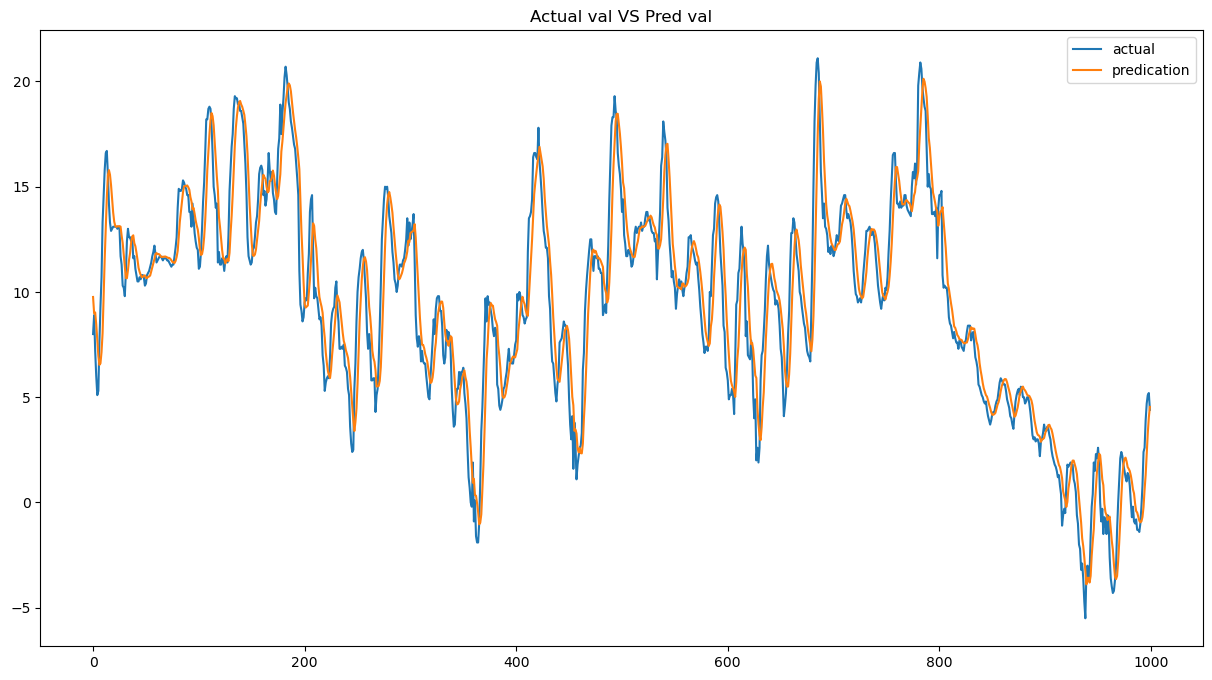

In [208]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_val)
plt.plot(val_pred)
plt.legend(['actual','predication'])
plt.title("Actual val VS Pred val")
plt.show()

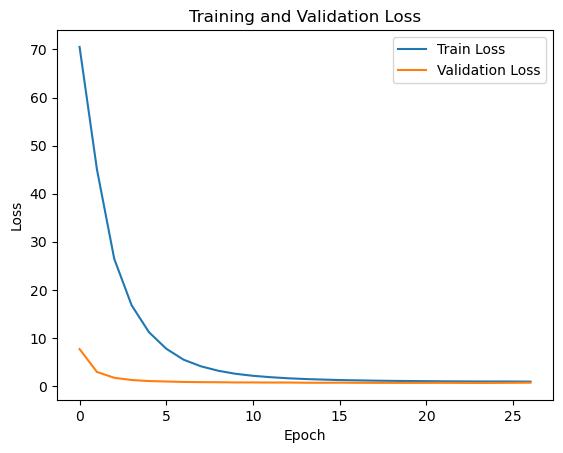

In [209]:
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [210]:
test_pred=model3.predict(x_test).flatten()
test_result=pd.DataFrame(data={"actual":y_test.reshape(-1),"pred":test_pred})
r2=np.round(r2_score(y_test,test_pred),2)
print (r2)
print ("-------------------------------------")
test_result

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.98
-------------------------------------


,actual,pred
0,3.2,4.080004
1,2.4,2.666706
2,1.8,1.929145
3,1.7,1.428258
4,0.5,1.509606
...,...,...
1274,0.1,-1.322886
1275,0.2,0.145943
1276,-0.5,0.657824
1277,-0.2,-0.389413


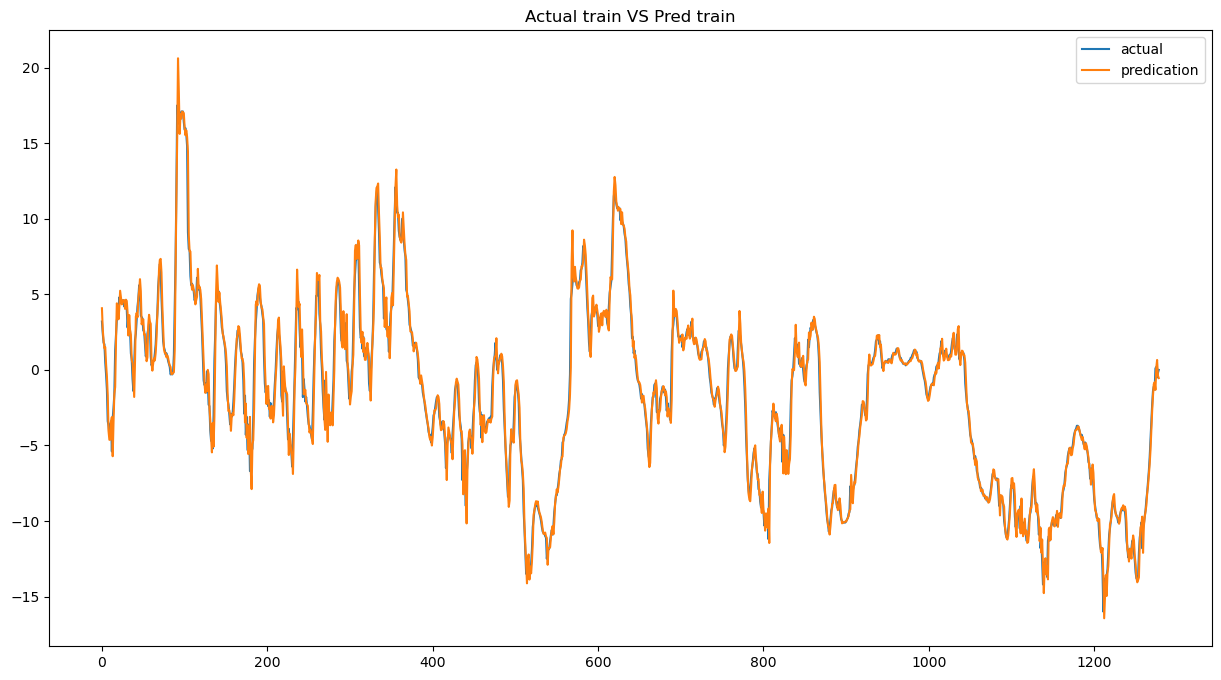

In [211]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(test_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

__"This investigation compared the performance of three deep learning models on a specific task. While all models achieved similar accuracy, the 1D convolutional neural network (CNN) emerged as the most parsimonious choice. The CNN architecture boasted significantly fewer parameters (617) compared to the recurrent neural networks (RNNs) - Gated Recurrent Unit (GRU) with 13,393 parameters and Long Short-Term Memory (LSTM) with 200,225 parameters. This translates to a more lightweight model, potentially reducing computational cost and memory footprint during training and deployment."__